## KIBA download

In [47]:
# from tdc.multi_pred import DTI
# data = DTI(name = 'KIBA')
# split = data.get_split()

In [48]:
# # pickle 파일로 저장
# print(type(split))
# print(split.keys())

# import pickle

# with open("kiba.pkl", "wb") as file:
#     pickle.dump(split, file)

## Load KIBA

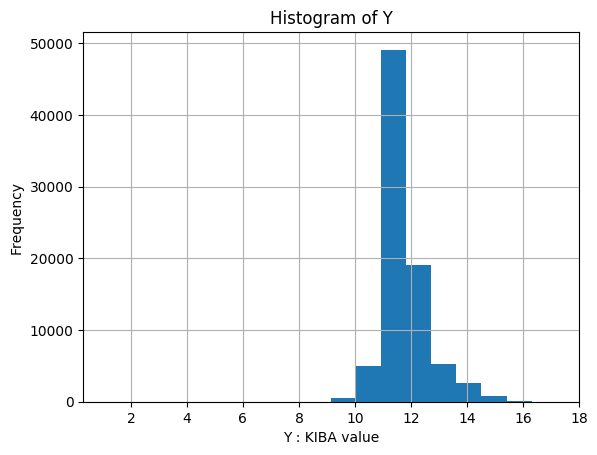

In [49]:
import pickle

file_path = 'kiba.pkl'

with open(file_path, 'rb') as file:
    split = pickle.load(file)


train = split['train']
val = split['valid']
test = split['test']

import matplotlib.pyplot as plt

train['Y'].hist(bins=18)
plt.xlabel("Y : KIBA value")
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format("Y"))
plt.show()


In [50]:
threshold = 12.1
train['Class'] = train['Y'].apply(lambda x: 1 if x > threshold else 0)
print(train['Class'].value_counts())
print(train.columns)
train['Y'].describe()

0    66482
1    15878
Name: Class, dtype: int64
Index(['Drug_ID', 'Drug', 'Target_ID', 'Target', 'Y', 'Class'], dtype='object')


count    82360.000000
mean        11.723211
std          0.834467
min          1.100000
25%         11.200000
50%         11.581486
75%         11.953872
max         17.200179
Name: Y, dtype: float64

In [51]:

val['Class'] = val['Y'].apply(lambda x: 1 if x > threshold else 0)
print(val['Class'].value_counts())

0    9545
1    2221
Name: Class, dtype: int64


In [52]:

test['Class'] = test['Y'].apply(lambda x: 1 if x > threshold else 0)
print(test['Class'].value_counts())

0    19064
1     4467
Name: Class, dtype: int64


In [53]:
import pandas as pd

combined_df = pd.concat([train, val, test])

kiba = combined_df.reset_index(drop=True)

print(kiba)
print(kiba['Class'].value_counts())

              Drug_ID                                               Drug  \
0       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
1       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
2       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
3       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
4       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
...               ...                                                ...   
117652  CHEMBL1993661  CNS(=O)(=O)c1ccccc1Nc1nc(Nc2cc(OC)c(OC)c(OC)c2...   
117653   CHEMBL497151         O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1   
117654  CHEMBL1976376    Nc1ncnc2c1c(-c1ccc(Oc3ccc(CO)cc3)cc1)cn2C1CCOC1   
117655   CHEMBL234085           CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12   
117656  CHEMBL1984686                        Brc1ccc2cnc(Nc3ccncn3)cc2c1   

       Target_ID                                             Target  \
0         O14920

## convert chembl to pubchem

In [54]:
### pubchem input에 넣을 파일
import numpy as np

with open("kiba_chembl", 'w') as file:
    for id in kiba['Drug_ID']:
        file.write(id + '\n')

In [55]:
import pandas as pd

## 변환 과정에서 유실된 ID들을 확인

data = pd.read_csv("kiba_chembl2pubchem.txt", sep='\t', header=None)
# print(data)
print(data[:][data[1].isna()].drop_duplicates())
# data[1] = data[1].apply(lambda x: int(x))
# print(data)

# with open("kiba_drug_ctable.txt") as f:
#     data = f.read()

# print(type(data))
# print(data)

### pubChem에서 조회가 되는 CHEMBL ID들은 직접 변환
data.loc[data[0] == "CHEMBL295132", 1] = 468758
data.loc[data[0] == "CHEMBL44137", 1] = 468759
data.loc[data[0] == "CHEMBL47243", 1] = 24203043

print(data[:][data[1].isna()].drop_duplicates())
# print(data[:][data[1].isna()])

                  0   1
78652  CHEMBL269557 NaN
78827  CHEMBL295132 NaN
79617  CHEMBL384283 NaN
79690  CHEMBL409397 NaN
79728  CHEMBL413375 NaN
79932   CHEMBL44137 NaN
79993   CHEMBL47243 NaN
                  0   1
78652  CHEMBL269557 NaN
79617  CHEMBL384283 NaN
79690  CHEMBL409397 NaN
79728  CHEMBL413375 NaN


In [56]:
print(data)
data[1] = data[1].astype(float).astype(pd.Int64Dtype(), errors='ignore')
print(data)
data.to_csv("kiba_chembl2pubchem", index=False)

                    0            1
0       CHEMBL1087421   44138048.0
1       CHEMBL1087421   44138048.0
2       CHEMBL1087421   44138048.0
3       CHEMBL1087421   44138048.0
4       CHEMBL1087421   44138048.0
...               ...          ...
117652  CHEMBL1993661   49830508.0
117653   CHEMBL497151  136027078.0
117654  CHEMBL1976376   49830756.0
117655   CHEMBL234085    9818231.0
117656  CHEMBL1984686   49831052.0

[117657 rows x 2 columns]
                    0          1
0       CHEMBL1087421   44138048
1       CHEMBL1087421   44138048
2       CHEMBL1087421   44138048
3       CHEMBL1087421   44138048
4       CHEMBL1087421   44138048
...               ...        ...
117652  CHEMBL1993661   49830508
117653   CHEMBL497151  136027078
117654  CHEMBL1976376   49830756
117655   CHEMBL234085    9818231
117656  CHEMBL1984686   49831052

[117657 rows x 2 columns]


In [57]:
## attach PuhChemID to kiba
kiba['d_ID'] = data[1]
print(kiba['d_ID'].isna().sum())

44


### chembl2pubchem 과정에서 변환되지 않는 결측치 44개 제거

In [58]:
import numpy as np
exclude = np.array(data[0][data[1].isna()].drop_duplicates())

kiba = kiba[~kiba['Drug_ID'].isin(exclude)]
print(kiba)
print(len(kiba))

              Drug_ID                                               Drug  \
0       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
1       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
2       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
3       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
4       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
...               ...                                                ...   
117652  CHEMBL1993661  CNS(=O)(=O)c1ccccc1Nc1nc(Nc2cc(OC)c(OC)c(OC)c2...   
117653   CHEMBL497151         O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1   
117654  CHEMBL1976376    Nc1ncnc2c1c(-c1ccc(Oc3ccc(CO)cc3)cc1)cn2C1CCOC1   
117655   CHEMBL234085           CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12   
117656  CHEMBL1984686                        Brc1ccc2cnc(Nc3ccncn3)cc2c1   

       Target_ID                                             Target  \
0         O14920

In [59]:
kiba.to_csv("kiba")


## Convert protein to gene

In [60]:
protein2gene = pd.read_csv("convert_table", delimiter="\t")
print(kiba.head(2))
print(protein2gene.head(2))

         Drug_ID                                     Drug Target_ID  \
0  CHEMBL1087421  COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2    O14920   
1  CHEMBL1087421  COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2    P04626   

                                              Target     Y  Class      d_ID  
0  MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...  11.1      0  44138048  
1  MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...  11.1      0  44138048  
  UniProtKB Gene Name ID Gene name NCBI gene (formerly Entrezgene) ID
0             A0A023T6R1    MAGOHB                        Gene::55110
1             A0A023T787     RBM8A                         Gene::9939


In [61]:
merged_df = kiba.merge(protein2gene[['UniProtKB Gene Name ID', 'Gene name', 'NCBI gene (formerly Entrezgene) ID']], left_on='Target_ID', right_on='UniProtKB Gene Name ID', how='left')

# Drop the duplicated column
merged_df.drop(columns='UniProtKB Gene Name ID', inplace=True)

merged_df.rename(columns={'NCBI gene (formerly Entrezgene) ID': 'gene_ID'}, inplace=True)
kiba = merged_df
print(kiba)
kiba.to_csv("kiba")

              Drug_ID                                               Drug  \
0       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
1       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
2       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
3       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
4       CHEMBL1087421            COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2   
...               ...                                                ...   
117608  CHEMBL1993661  CNS(=O)(=O)c1ccccc1Nc1nc(Nc2cc(OC)c(OC)c(OC)c2...   
117609   CHEMBL497151         O=c1nc(-c2cc3c(Oc4ccc(I)cc4)cncc3s2)[nH]o1   
117610  CHEMBL1976376    Nc1ncnc2c1c(-c1ccc(Oc3ccc(CO)cc3)cc1)cn2C1CCOC1   
117611   CHEMBL234085           CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12   
117612  CHEMBL1984686                        Brc1ccc2cnc(Nc3ccncn3)cc2c1   

       Target_ID                                             Target  \
0         O14920

### convert previous gene name to original gene name and hetionet node name

In [62]:
print(kiba['gene_ID'].isna().sum())
print(kiba.head(3))

### genenames에 넣을 파일
with open("kiba_previousgene", 'w') as file:
    for id in kiba['Gene name']:
        file.write(str(id) + '\n')

1255
         Drug_ID                                     Drug Target_ID  \
0  CHEMBL1087421  COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2    O14920   
1  CHEMBL1087421  COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2    P04626   
2  CHEMBL1087421  COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2    P06239   

                                              Target     Y  Class      d_ID  \
0  MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...  11.1      0  44138048   
1  MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...  11.1      0  44138048   
2  MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...  11.1      0  44138048   

  Gene name     gene_ID  
0     IKBKB  Gene::3551  
1     ERBB2  Gene::2064  
2       LCK  Gene::3932  


In [63]:
# ### davis도 genenames에 넣어보기
# davis = pd.read_csv("../davis/davis", delimiter=",")
# print(davis.columns)
# print(davis.head(2))
# for i in davis['Target_ID']:
#     if len(i)> 8:
#         print(i)
# # with open("davis_previousgene", 'w') as file:
# #     for id in kiba['Target_ID']:
# #         file.write(str(id) + '\n')

In [64]:
#### previous gene to official gene 먼저 진행 후 pubchem id to db id ㄱㄱ

## Convert pubchem id to  DB id

In [65]:
import numpy as np
import pandas as pd

In [66]:
### mbrole2, pubchem input에 넣을 파일
# import numpy as np

# with open("kiba_pubchem", 'w') as file:
#     for id in kiba['d_ID']:
#         file.write(str(id) + '\n')

In [67]:
### mbrole2 output 결과 파일
pubchem2drugbank =  pd.read_csv("mbrole2_conversion07062341.tsv", delimiter='\t')
print(len(kiba['d_ID'].drop_duplicates()))
print(len(pubchem2drugbank))
print(pubchem2drugbank)


2064
62
       Input Input_source   Output Output_source
0   10125830  PubChem CID  DB07078      DrugBank
1   16046126  PubChem CID  DB06888      DrugBank
2   17754396  PubChem CID  DB06932      DrugBank
3   24856363  PubChem CID  DB07835      DrugBank
4   10089048  PubChem CID  DB07811      DrugBank
..       ...          ...      ...           ...
57   5330812  PubChem CID  DB07664      DrugBank
58      4592  PubChem CID  DB02116      DrugBank
59   5280343  PubChem CID  DB04216      DrugBank
60    448991  PubChem CID  DB02733      DrugBank
61      2396  PubChem CID  DB03777      DrugBank

[62 rows x 4 columns]


In [68]:
### pubchem output 결과 파일
pubchem2drugbank = pd.read_csv("kiba_pubchem2drugbank.txt", sep='\t',header=None)
print("원본 샘플수 :",len(pubchem2drugbank))
print("변환불가 결측치 :",pubchem2drugbank[1].isna().sum())
print("원본 drug type 개수 :",len(pubchem2drugbank[0].drop_duplicates()))
print("변환불가 샘플 제거후 drug type 개수 :",len(pubchem2drugbank[1].drop_duplicates()))
kiba['db_ID'] = pubchem2drugbank[1]
print(kiba.head(3))

# notconverted = np.array(pubchem2drugbank[0][pubchem2drugbank[1].isna()].drop_duplicates())
# for i in notconverted:
#     print(i)

원본 샘플수 : 117762
변환불가 결측치 : 112439
원본 drug type 개수 : 2064
변환불가 샘플 제거후 drug type 개수 : 87
         Drug_ID                                     Drug Target_ID  \
0  CHEMBL1087421  COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2    O14920   
1  CHEMBL1087421  COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2    P04626   
2  CHEMBL1087421  COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2    P06239   

                                              Target     Y  Class      d_ID  \
0  MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...  11.1      0  44138048   
1  MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...  11.1      0  44138048   
2  MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...  11.1      0  44138048   

  Gene name     gene_ID db_ID  
0     IKBKB  Gene::3551   NaN  
1     ERBB2  Gene::2064   NaN  
2       LCK  Gene::3932   NaN  


In [69]:
print(kiba.columns)
print(kiba['db_ID'].isna())
kiba_post = kiba.dropna()

Index(['Drug_ID', 'Drug', 'Target_ID', 'Target', 'Y', 'Class', 'd_ID',
       'Gene name', 'gene_ID', 'db_ID'],
      dtype='object')
0          True
1          True
2          True
3          True
4          True
          ...  
117608     True
117609     True
117610     True
117611     True
117612    False
Name: db_ID, Length: 117613, dtype: bool


In [70]:
print(len(kiba_post))
print(kiba_post)
print(kiba_post.columns)

5265
              Drug_ID                                           Drug  \
282      CHEMBL202930  COc1cc(-c2ccc3c(c2)NC(=O)C3=Cc2ccc[nH]2)ccc1O   
283      CHEMBL202930  COc1cc(-c2ccc3c(c2)NC(=O)C3=Cc2ccc[nH]2)ccc1O   
284      CHEMBL202930  COc1cc(-c2ccc3c(c2)NC(=O)C3=Cc2ccc[nH]2)ccc1O   
285      CHEMBL202930  COc1cc(-c2ccc3c(c2)NC(=O)C3=Cc2ccc[nH]2)ccc1O   
286      CHEMBL202930  COc1cc(-c2ccc3c(c2)NC(=O)C3=Cc2ccc[nH]2)ccc1O   
...               ...                                            ...   
117539   CHEMBL413779  N#Cc1ncc2nc1OCCCCCOc1cc(OCCO)c(Cl)cc1NC(=O)N2   
117559  CHEMBL1964644          O=C(NCc1ccccc1)Nc1ncc([N+](=O)[O-])s1   
117578  CHEMBL1998414         Cc1[nH]nc2sc(C(=O)NCCc3ccc(Cl)cc3)cc12   
117594  CHEMBL1990254         NCC(NC(=O)c1ccc(-c2ccncc2)cc1)c1ccccc1   
117612  CHEMBL1984686                    Brc1ccc2cnc(Nc3ccncn3)cc2c1   

       Target_ID                                             Target  \
282       O00141  MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQK

## Get sumgnn format & train/val/test 

In [71]:
dti = kiba_post[['db_ID','gene_ID','Class']]
print(dti)
print(dti['db_ID'].drop_duplicates())
dti['Class'].value_counts()


          db_ID      gene_ID  Class
282     DB07078   Gene::6446      0
283     DB07078  Gene::11200      0
284     DB07078   Gene::1956      0
285     DB07078    Gene::983      0
286     DB07078   Gene::6714      0
...         ...          ...    ...
117539  DB06436   Gene::5582      0
117559  DB12064    Gene::640      0
117578  DB12064   Gene::4916      1
117594  DB07460   Gene::2261      0
117612  DB08162   Gene::2534      0

[5265 rows x 3 columns]
282      DB07078
1215     DB06888
1620     DB06932
2433     DB07835
2474     DB07811
          ...   
81586    DB02116
81772    DB04216
81882    DB07364
81964    DB02733
82100    DB03777
Name: db_ID, Length: 86, dtype: object


0    4067
1    1198
Name: Class, dtype: int64

In [72]:
import json

with open('entity_target.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)

df = df.T

In [73]:
temp_list = []
for i in dti['gene_ID'] :
    exist = False
    for cn, j in enumerate(df.index) :
        length = len(df.index)
        if i == j :
            exist = True
            val = int(df[0].loc[j])
            temp_list.append(val)
            break
        elif cn == length -1 :
            temp_list.append(np.nan)
print(len(temp_list))
dti['gene_enco'] = temp_list

5265


/tmp/ipykernel_3247563/2403471812.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dti['gene_enco'] = temp_list


In [83]:
import json

json_file = 'node2id.json'
with open(json_file) as f:
    data = json.load(f)

temp_list2 = [] 
for i in dti["db_ID"].copy() :
    exist = False
    count = 0
    for name, number in data.items() :
        length = len(data)
        if i == name :
            exist = True
            temp_list2.append(int(number))
            break
        elif count >= length -1 :
            temp_list2.append(np.nan)
        count += 1
print(len(temp_list2))
print(pd.Series(temp_list2).value_counts())
dti['drug_enco'] = temp_list2

214
1394    73
381     48
313     19
31      17
1238    12
882     12
580     11
616     11
162     11
dtype: int64


/tmp/ipykernel_3247563/1377383399.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dti['drug_enco'] = temp_list2


In [84]:
print(dti)
dti.dropna(inplace=True)
print(dti)
print(dti['Class'].value_counts())

          db_ID      gene_ID  Class  gene_enco  drug_enco
62409   DB12332   Gene::9149      1       7152        381
62410   DB12332   Gene::1111      0       5038        381
62411   DB12332  Gene::11200      0       3141        381
62412   DB12332    Gene::983      0       1784        381
62413   DB12332   Gene::3815      1       3811        381
...         ...          ...    ...        ...        ...
115380  DB12332    Gene::816      0       6130        381
115514  DB09073   Gene::2872      0       2511       1394
115776  DB12332   Gene::5566      0       2273        381
115811  DB00643   Gene::9833      1       6959        580
116434  DB12332   Gene::3984      0       3088        381

[214 rows x 5 columns]
          db_ID      gene_ID  Class  gene_enco  drug_enco
62409   DB12332   Gene::9149      1       7152        381
62410   DB12332   Gene::1111      0       5038        381
62411   DB12332  Gene::11200      0       3141        381
62412   DB12332    Gene::983      0       1784  

/home/wjdtjr980/.conda/envs/sumgnn/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [85]:
dti[['gene_enco', 'drug_enco', 'Class']].to_csv('kiba.txt', sep=' ', index=False, header=None)

### 7:1:2 train/val/test split

In [77]:
import random

# Set the random seed for reproducibility
random.seed(42)

# Define the file paths
input_file = "kiba.txt"
output_train = "train.txt"
output_dev = "dev.txt"
output_test = "test.txt"

# Read the input dataset
with open(input_file, "r") as file:
    lines = file.readlines()

# Shuffle the lines randomly
random.shuffle(lines)

# Calculate the split sizes
total_lines = len(lines)
train_size = int(0.7 * total_lines)
dev_size = int(0.1 * total_lines)

# Split the dataset
train_data = lines[:train_size]
dev_data = lines[train_size : train_size + dev_size]
test_data = lines[train_size + dev_size:]

# Save the split datasets to separate files
with open(output_train, "w") as file:
    file.writelines(train_data)

with open(output_dev, "w") as file:
    file.writelines(dev_data)

with open(output_test, "w") as file:
    file.writelines(test_data)